# Olymic Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = '../datasets/'
bios = pd.read_csv(f'{path}bios.csv')
countries = pd.read_csv( f'{path}noc_regions.csv' )
population = pd.read_csv(f'{path}populations.csv')
results = pd.read_csv( f'{path}results.csv' )

# Import all the datasets

In [3]:
bios.head(3)

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN


In [4]:
countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
countries.drop('notes',axis=1,inplace=True)

In [6]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [7]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [8]:
bios[['Height_cm', 'Weight_kg']] = bios['Measurements'].str.extract(r'(\d+)\s*cm\s*/\s*(\d+)\s*kg')

bios['Height_cm'] = bios['Height_cm'].astype(float)
bios['Weight_kg'] = bios['Weight_kg'].astype(float)

In [9]:
bios[['Date_of_Birth', 'Place_of_Birth']] = bios['Born'].str.extract(r'^\s*(.+?)\s+in\s+(.+)$')
bios['Date_of_Birth'] = pd.to_datetime(bios['Date_of_Birth'], errors='coerce')

In [10]:
bios[['Date_of_dearth', 'Place_of_dearth']] = bios['Died'].str.extract(r'^\s*(.+?)\s+in\s+(.+)$')
bios['Date_of_dearth'] = pd.to_datetime(bios['Date_of_dearth'], errors='coerce')

In [11]:
bios['Country_Code'] = bios['Place_of_Birth'].str.extract(r'\(([^)]+)\)')

In [12]:
bios.rename(columns={ "NOC":"Country" , "Used name":"Name" },inplace=True)

In [13]:
remove_cols = [ 'Born' ,'Died', 'Measurements',"Full name","Other names","Title(s)","Original name","Name order","Nick/petnames","Affiliations","Nationality" ]

bios.drop(columns=remove_cols ,axis=1,inplace=True)

In [14]:
bios.head(3)

,Roles,Sex,Name,Country,athlete_id,Height_cm,Weight_kg,Date_of_Birth,Place_of_Birth,Date_of_dearth,Place_of_dearth,Country_Code
0,Competed in Olympic Games,Male,Jean-François•Blanchy,France,1,NaN,NaN,1886-12-12,"Bordeaux, Gironde (FRA)",1960-10-02,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",FRA
1,Competed in Olympic Games,Male,Arnaud•Boetsch,France,2,183.0,76.0,1969-04-01,"Meulan, Yvelines (FRA)",NaT,NaN,FRA
2,Competed in Olympic Games • Administrator,Male,Jean•Borotra,France,3,183.0,76.0,1898-08-13,"Biarritz, Pyrénées-Atlantiques (FRA)",1994-07-17,"Arbonne, Pyrénées-Atlantiques (FRA)",FRA


In [15]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Roles            145500 non-null  object        
 1   Sex              145500 non-null  object        
 2   Name             145500 non-null  object        
 3   Country          145499 non-null  object        
 4   athlete_id       145500 non-null  int64         
 5   Height_cm        102070 non-null  float64       
 6   Weight_kg        102070 non-null  float64       
 7   Date_of_Birth    120026 non-null  datetime64[ns]
 8   Place_of_Birth   120855 non-null  object        
 9   Date_of_dearth   28052 non-null   datetime64[ns]
 10  Place_of_dearth  28840 non-null   object        
 11  Country_Code     120855 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 13.3+ MB


In [16]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [17]:
medals = results[ results['medal'].notna() ]
medals.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze
12,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jacques Brugnon,4,FRA,Henri Cochet,2.0,False,Silver
14,1912.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Albert Canet,5,FRA,Marguerite Broquedis,3.0,False,Bronze
15,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Albert Canet,5,FRA,Édouard Mény de Marangue,3.0,False,Bronze
21,2000.0,Summer,Table Tennis,"Doubles, Men (Olympic)",Patrick Chila,7,FRA,Jean-Philippe Gatien,3.0,False,Bronze


In [18]:
def plotBarGraph( X,Y,XLabel,YLabel,label,title,color='blue' ):
    plt.figure(figsize=(20,5))
    plt.bar( x=X,height=Y,color=color,label=label )
    plt.title(title)
    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    # plt.xticks(degree=45)
    plt.legend()
    plt.show()

# Top 20 countries having the highest No.of medals

In [19]:
medal_count = medals['noc'].value_counts().head(20)

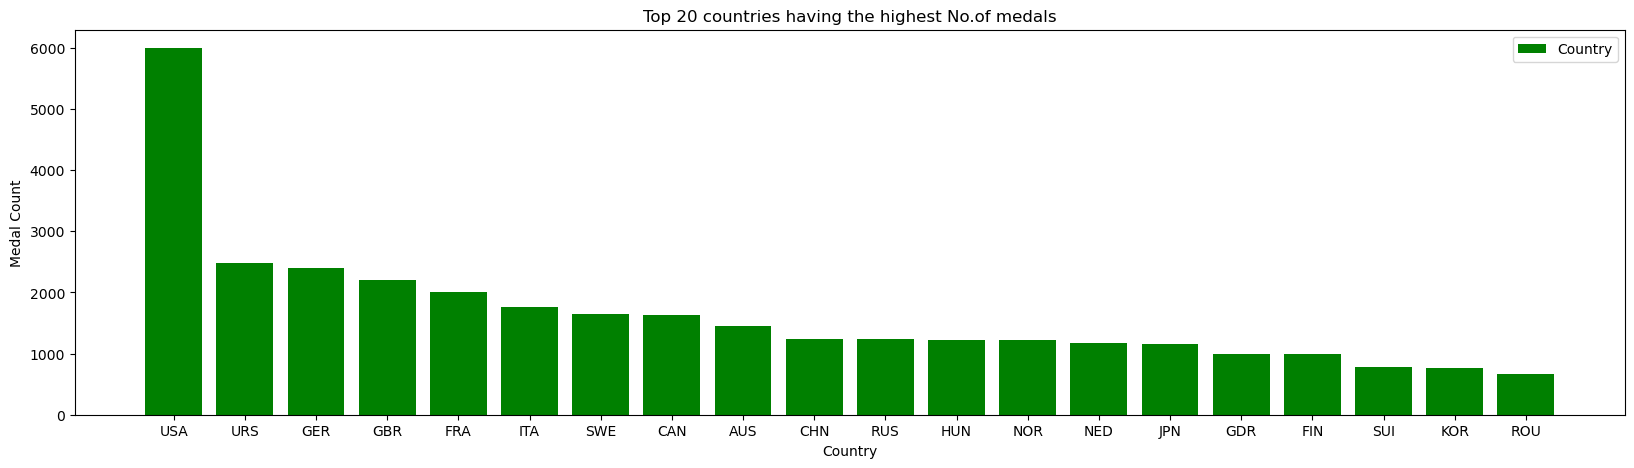

In [20]:
plotBarGraph( medal_count.index , medal_count.values ,
             XLabel="Country", YLabel="Medal Count",
             label='Country',
             title="Top 20 countries having the highest No.of medals",
             color="green" )

# Specific Country medals

In [21]:
results.noc.unique()

array(['FRA', 'GBR', 'FRG', 'GER', 'GHA', 'GRE', 'GUA', 'HAI', 'HKG',
       'HUN', 'TKM', 'INA', 'AUT', 'NED', 'IND', 'ARG', 'AUS', 'BEL',
       'BHU', 'BLR', 'BRA', 'BUL', 'CAN', 'CHN', 'COL', 'CRC', 'CYP',
       'DEN', 'ESP', 'EST', 'FIN', 'EUN', 'GEO', 'USA', 'GUM', 'ARM',
       'BAH', 'BER', 'BIH', 'URS', 'BOH', 'TCH', 'CHI', 'TPE', 'IRI',
       'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KOR',
       'KSA', 'KUW', 'LAT', 'LBA', 'LBN', 'LTU', 'LUX', 'MAD', 'MAR',
       'MAS', 'MRI', 'MEX', 'NGR', 'NOR', 'NZL', 'PAK', 'PAR', 'PER',
       'PHI', 'POL', 'BUR', 'CAF', 'CAM', 'CGO', 'EGY', 'CHA', 'CIV',
       'CMR', 'COK', 'PUR', 'CUB', 'DOM', 'CRO', 'CZE', 'BEN', 'ECU',
       'UAR', 'ESA', 'KAZ', 'KEN', 'MDA', 'MGL', 'MLT', 'MON', 'POR',
       'PRK', 'ROU', 'RSA', 'RUS', 'SLO', 'SMR', 'SOL', 'SUI', 'SWE',
       'THA', 'TUR', 'UKR', 'YUG', 'ZIM', 'ALG', 'QAT', 'SGP', 'SRI',
       'SUD', 'SUR', 'SVK', 'TTO', 'TUN', 'UGA', 'URU', 'UZB', 'VEN',
       'IOA', 'SCG',

In [22]:
country_code = 'JPN'
types_of_medals = medals[ medals['noc'] == country_code ]['medal'].value_counts()

country_name = countries[ countries['NOC'] == country_code ]['region'].values[0]

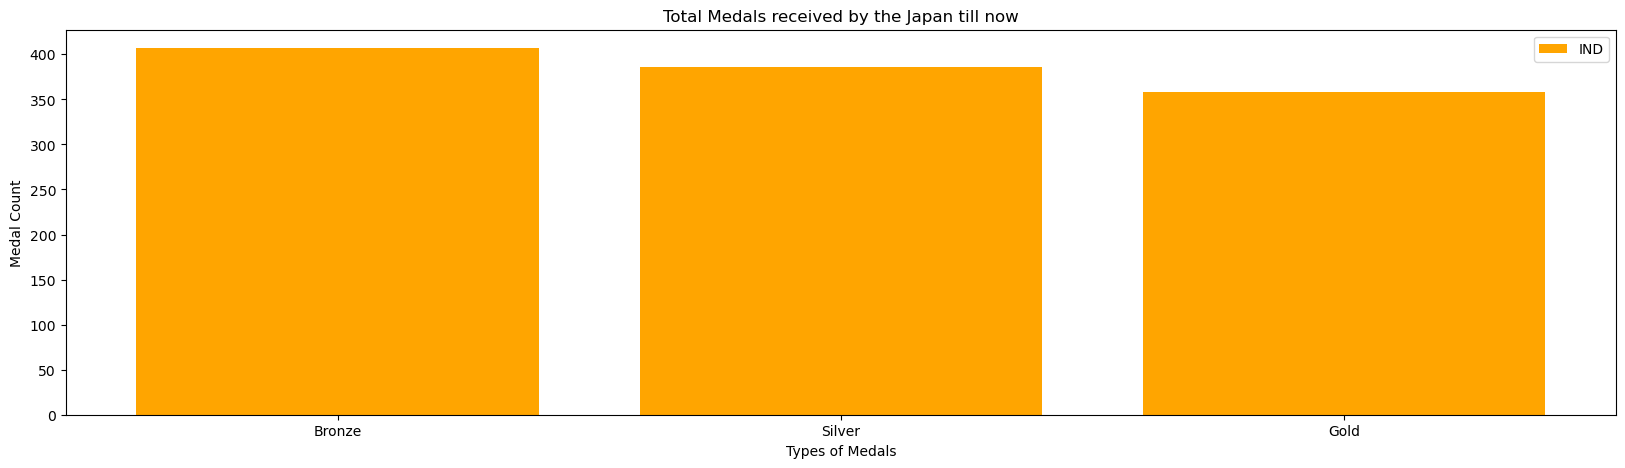

In [51]:
plotBarGraph( X=types_of_medals.index , Y=types_of_medals.values , 
             XLabel='Types of Medals',YLabel='Medal Count',
             title=f'Total Medals received by the {country_name} till now' , 
             label=country_code , color='orange' )

In [55]:
medals['discipline'].unique()

array(['Tennis', 'Table Tennis', 'Badminton', 'Athletics',
       'Art Competitions', 'Archery', 'Boxing',
       'Softball (Baseball/Softball)', 'Baseball (Baseball/Softball)',
       'Golf', 'Basketball (Basketball)', 'Bobsleigh (Bobsleigh)',
       'Canoe Slalom (Canoeing)', 'Canoe Sprint (Canoeing)',
       'Canoe Marathon (Canoeing)', 'Cycling Road (Cycling)', 'Polo',
       'Rugby (Rugby)', 'Equestrian Dressage (Equestrian)',
       'Equestrian Jumping (Equestrian)', 'Tug-Of-War', 'Lacrosse',
       'Equestrian Eventing (Equestrian)',
       'Equestrian Vaulting (Equestrian)', 'Fencing',
       'Equestrian Driving (Equestrian)', 'Cycling Track (Cycling)',
       'Cycling Mountain Bike (Cycling)', 'Speed Skating (Skating)',
       'Rowing', 'Hockey', 'Cricket', 'Croquet', 'Motorboating',
       'Jeu De Paume', 'Racquets', 'Swimming (Aquatics)',
       'Modern Pentathlon', 'Shooting', 'Football (Football)',
       'Diving (Aquatics)', 'Artistic Gymnastics (Gymnastics)',
       'Rhy

# coutries having the highest medals in the particular sport

In [25]:
sport_name = 'Boxing'

sport_country_medals = medals[ medals['discipline'] == sport_name ]['noc'].value_counts().head(20)

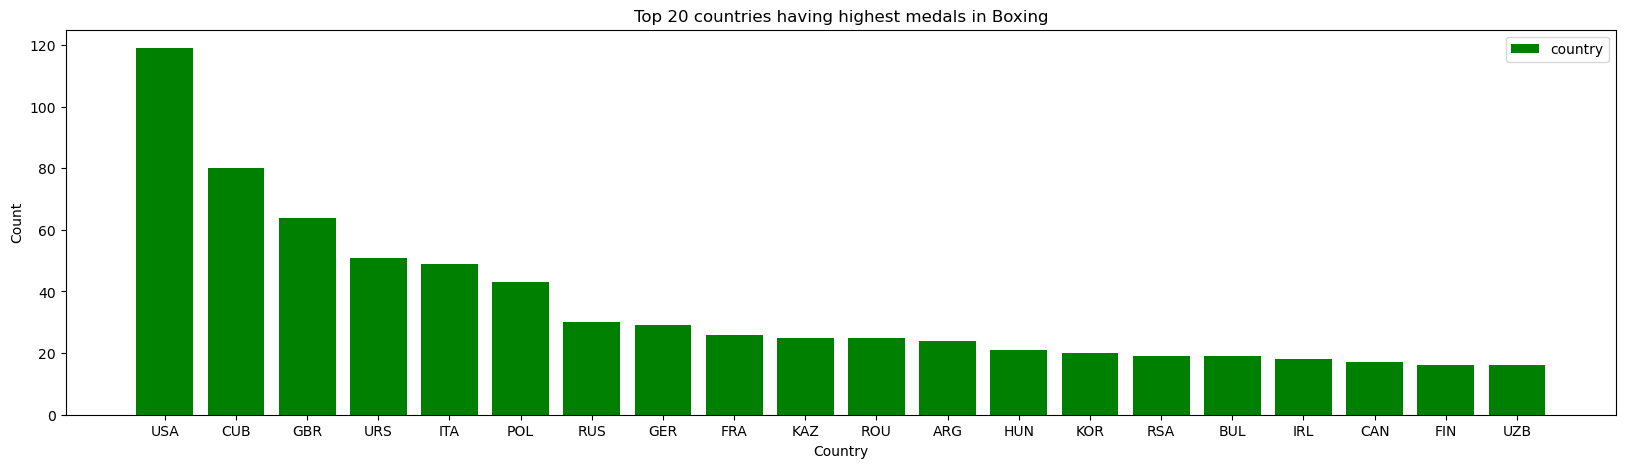

In [26]:
plotBarGraph( X=sport_country_medals.index , Y=sport_country_medals.values , 
             XLabel="Country",YLabel="Count",
             label='country',
             title=f'Top {sport_country_medals.shape[0]} countries having highest medals in {sport_name}', 
             color='green' )

In [27]:
year = 2016
year_country = medals[ medals['year'] == year ]['noc'].value_counts().head(20)

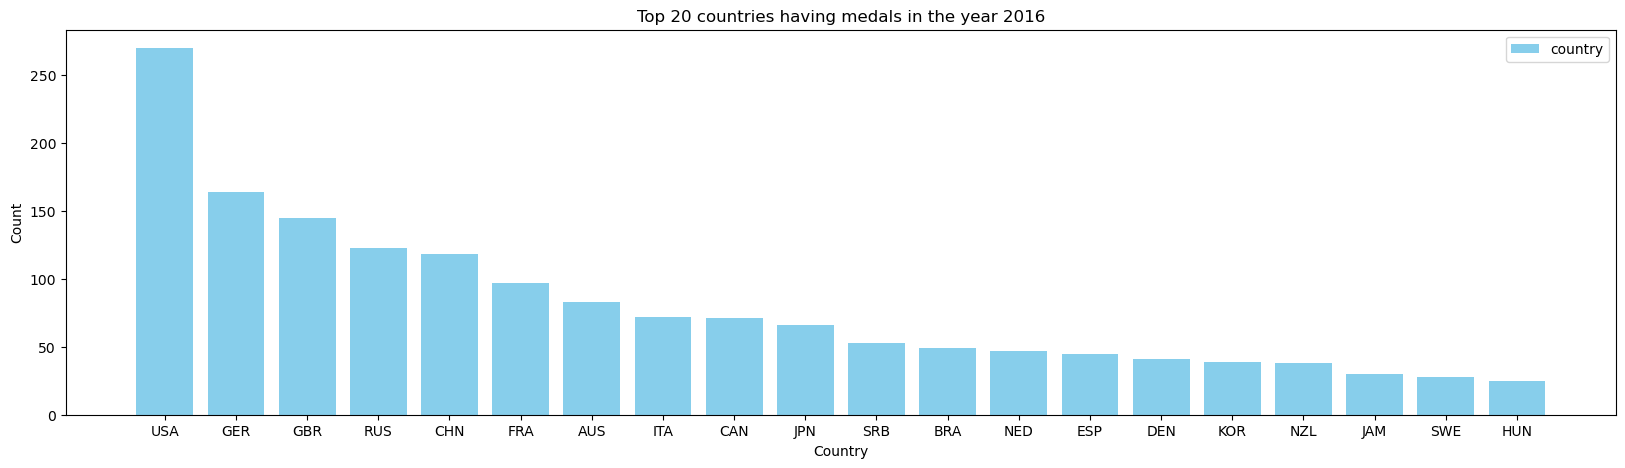

In [28]:
plotBarGraph(
    X=year_country.index , Y=year_country.values,
    XLabel="Country" , YLabel="Count", label='country',
    title=f'Top {year_country.shape[0]} countries having medals in the year {year}',
    color="skyblue"
)

In [29]:
def plotLineGraph( X,Y,XLabel,YLabel,label,title,color='blue' ):
    plt.figure(figsize=(15,5))
    plt.plot( X,Y,marker='o', linestyle='-',color=color,label=label )
    plt.title(title)
    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    # plt.xticks(degree=45)
    plt.legend()
    plt.show()

# Medals received by the specific country in year-wise

In [43]:
country_code = 'IND'

country_df = medals[ medals['noc'] == country_code ]

year_df = country_df.groupby('year')

specific_country_year = year_df['medal'].count()

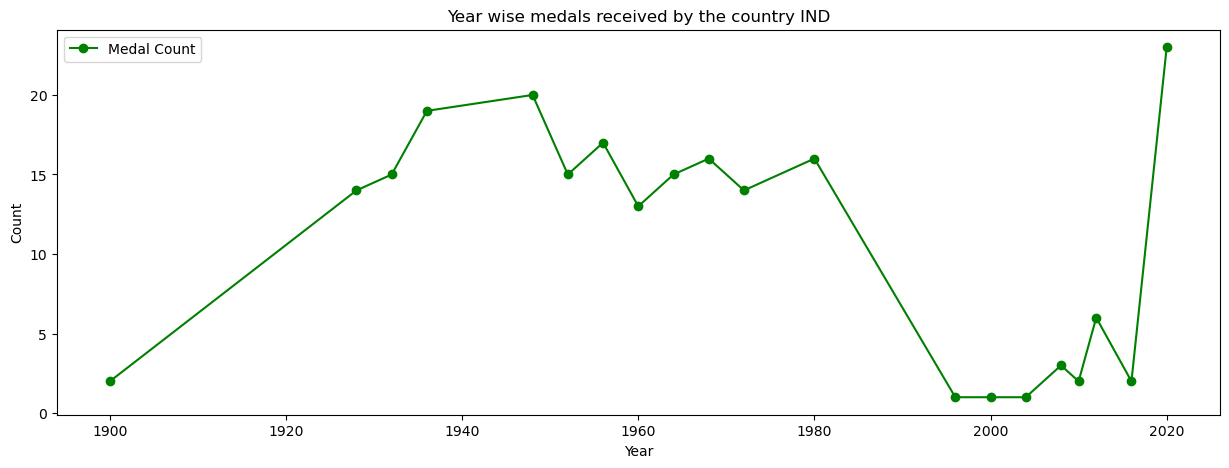

In [44]:
plotLineGraph(
    X=specific_country_year.index,Y=specific_country_year.values,
    XLabel="Year",YLabel="Count",label="Medal Count",
    title=f'Year wise medals received by the country {country_code}',
    color="green"
)

# Medals received by the country in a particular year

In [52]:
year = 2012
country_code = 'JPN'
country_df = medals[ (medals['noc'] == country_code) & (medals['year'] == year) ]
country_values = country_df['medal'].value_counts()

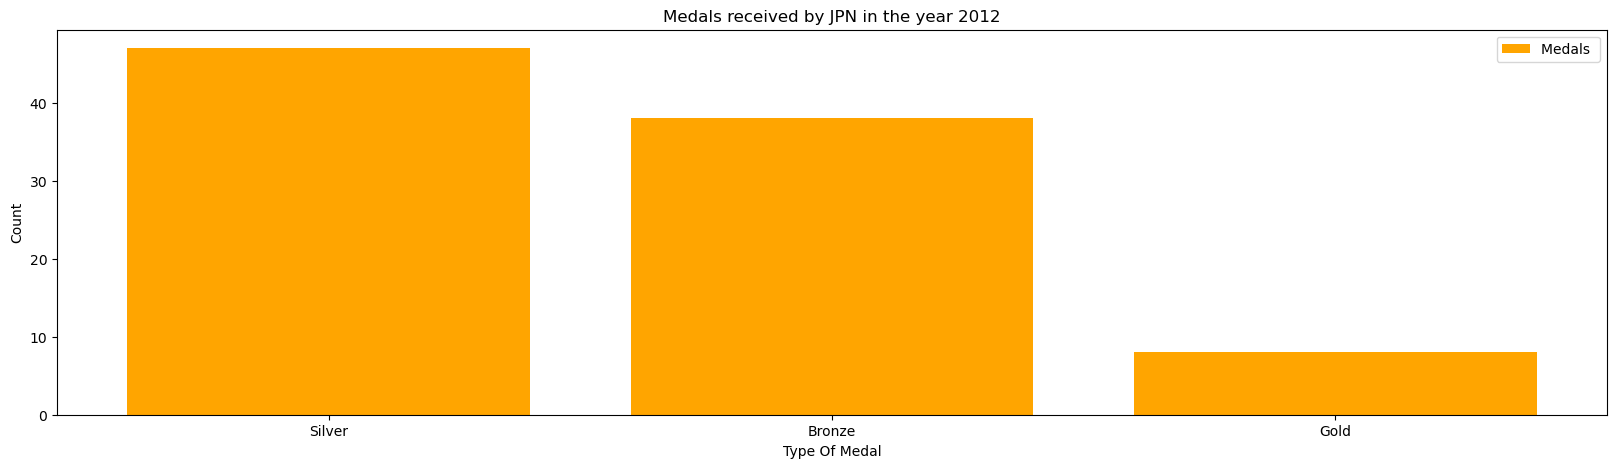

In [54]:
plotBarGraph(
    X=country_values.index,
    Y=country_values.values,
    XLabel="Type Of Medal",
    YLabel="Count",
    label='Medals ',
    title=f'Medals received by {country_code} in the year {year}',
    color='orange'
)

# Population of the specif country

In [32]:
country_code = 'IND'
country_data = population[ population['Country Code'] == country_code ].iloc[ : , 42:]

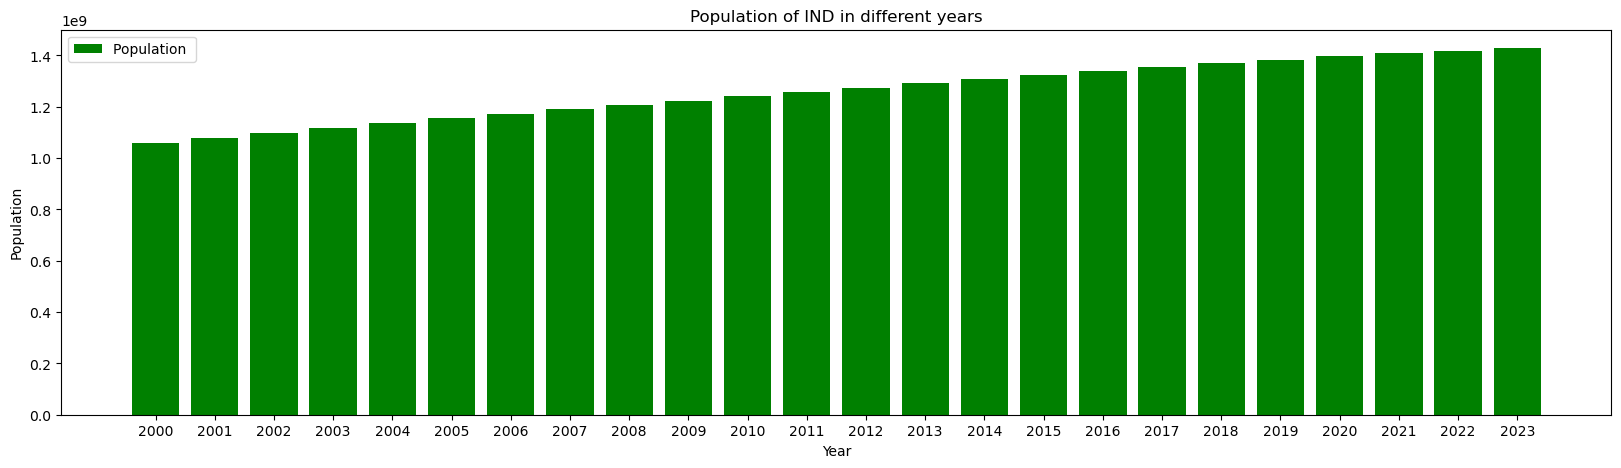

In [33]:
plotBarGraph(
    X=country_data.columns.tolist(),
    Y=country_data.values.flatten().tolist(),
    XLabel="Year",
    YLabel="Population",
    label=f'Population ',
    title=f'Population of {country_code} in different years',
    color='green'
)

In [34]:
medals.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze
12,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jacques Brugnon,4,FRA,Henri Cochet,2.0,False,Silver
14,1912.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Albert Canet,5,FRA,Marguerite Broquedis,3.0,False,Bronze
15,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Albert Canet,5,FRA,Édouard Mény de Marangue,3.0,False,Bronze
21,2000.0,Summer,Table Tennis,"Doubles, Men (Olympic)",Patrick Chila,7,FRA,Jean-Philippe Gatien,3.0,False,Bronze
